In [ ]:
import numpy as np
import ase
import os
import numpy as np
import matplotlib.pyplot as plt

from ase import io
from ase.geometry.analysis import Analysis
from ase import build
from ase.neighborlist import neighbor_list
from ase import Atoms
from ase.io import write, read
import re
from quippy.potential import Potential
import pickle
os.chdir('/Users/Moji/Documents/Summer20/Ge')

flatten = lambda l: [item for sublist in l for item in sublist]

In [ ]:
amo = [ase.Atoms(io.read('/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_cdr/run_64001/NPT/dump_npt_Ge_gap.' + str(i)
                         + '.cfg')) for i in range(220000, 240000, 1000)]
hiT_amo = [ase.Atoms(io.read('/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_cdr/run_64001/NPT/dump_npt_Ge_gap.' + str(i)
                                  + '.cfg')) for i in range(180000, 220000, 1000)]
inter = [ase.Atoms(io.read('/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_cdr/run_64001/NPT/dump_npt_Ge_gap.' + str(i)
                                  + '.cfg')) for i in range(140000, 180000, 1000)]
liquid = [ase.Atoms(io.read('/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_cdr/run_64001/NPT/dump_npt_Ge_gap.'
                            + str(i) + '.cfg')) for i in range(60000, 140000, 1000)]
hiT_liq = [ase.Atoms(io.read('/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_cdr/run_64001/NPT/dump_npt_Ge_gap.'
                            + str(i) + '.cfg')) for i in range(20000, 60000, 1000)]
MD = [amo, hiT_amo, inter, liquid, hiT_liq]

In [ ]:
dia = ase.Atoms(build.bulk('Ge', crystalstructure='diamond', cubic=True))
dia_s = build.make_supercell(dia, [[2, 0, 0],
                                  [0, 2, 0],
                                  [0, 0, 2]])

liq_ana = Analysis(liquid)
amo_ana = Analysis(amo)
dia_ana = Analysis(dia_s)
liq_3b_ana = Analysis(liquid_3b)

liq_rdf = np.average(liq_ana.get_rdf(4.9, 400), axis=0)
amo_rdf = np.average(amo_ana.get_rdf(4.9, 400), axis=0)
dia_rdf = np.average(dia_ana.get_rdf(4.9, 400), axis=0)
liq_3b_rdf = np.average(liq_3b_ana.get_rdf(4.9, 400), axis=0)

liq_n = [neighbor_list('i', i, cutoff=3.0) for i in liquid]
liq_n = [neighbor_list('i', i, cutoff=3.0) for i in liquid_3b]
amo_n = [neighbor_list('i', i, cutoff=3.0) for i in amo]
dia_n = neighbor_list('i', dia_s, cutoff=3.0)


np.average([np.bincount(i) for i in amo_n], axis=0)

np.average([np.bincount(i) for i in liq_n], axis=0)

dists = np.linspace(0, 4.9, 400)
fig, axs = plt.subplots(figsize=(10,10))
axs.scatter(dists, liq_rdf)
axs.scatter(dists, amo_rdf)
axs.scatter(dists, liq_3b_rdf)
#axs.scatter(dists, dia_rdf)
plt.show()

In [ ]:
T_csize_dat = [[i for i in T_set if i.get_global_number_of_atoms() == 64],
               [i for i in T_set if i.get_global_number_of_atoms() == 125],
                [i for i in T_set if i.get_global_number_of_atoms() == 216]]
T_qm_e_cs = [[at.info['dft_energy']/len(at) - zero_e for at in j] for j in T_csize_dat]
T_qm_f_cs = [[i for at in j for i in at.get_array('dft_forces').flatten()] for j in T_csize_dat]

In [ ]:
fig, axs = plt.subplots(figsize=(10,10))
axs.hist(T_qm_e_cs, bins=50, stacked=True, label=['64','125','216'])
plt.legend()
plt.show()

labels = [240, 120, 20, 180, 160]

In [ ]:
ans2 = [[Analysis(j) for j in i] for i in T_configs_s]
ans = [[Analysis(j) for j in i] for i in MD]
rdf = [np.average(np.array([i.get_rdf(4.9, 400) for i in j]), axis=0) for j in ans]
rdf2 = [np.average(np.array([i.get_rdf(4.9, 400) for i in j]), axis=0) for j in ans2]
dists = np.linspace(0, 4.9, 400)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
for i in range(len(rdf)):
    axs[0].scatter(dists, rdf[i], label=lab_sort[i], s=8)
    axs[1].scatter(dists, rdf2[i], label=lab_sort[i], s=8)

axs[0].set(ylim=(-0.5,6))
axs[1].set(ylim=(-0.5,6))
axs[0].text(1,4,'Ge-GAP')
axs[1].text(1,4,'Si-GAP')
axs[0].legend()
fig.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/Si-Ge-GAP_rdfs.png')

In [ ]:
lab_sort_rmse = ['{0:>4d}      {1:>5.2f}      {2:>5.3f}'.format(lab_sort[i],
                  rms_dict(T_qm_energies_s[i],T_gap_energies_s[i])['rmse']*1000,
                  rms_dict(T_qm_forces_s[i], T_gap_forces_s[i])['rmse'])
                  for i in range(len(lab_sort))]

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[1].hist(T_qm_forces, bins=500, stacked=False, label=lab_sort_rmse, histtype='step', density=False)
axs[0].hist(T_qm_energies, bins=50, stacked=False, label=lab_sort_rmse, histtype='step', density=False)
axs[1].set(xlabel='DFT Forces / eV/Å', xlim=(-5.0,5.0))
axs[0].set(xlabel='DFT Energies per atom / eV', ylabel='Frequency')
axs[0].legend(title = '    time     $E_{energy}$     $E_{forces}$')
plt.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/timestep_rmse.png')

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[1].hist(T_qm_f_cs, bins=500, stacked=False, label=['64','125','216'], histtype='step', density=True)
axs[0].hist(T_qm_e_cs, bins=50, stacked=False, label=['64','125','216'], histtype='step', density=True)
axs[1].set(xlabel='DFT Forces / eV/Å', xlim=(-5.0,5.0))
axs[0].set(xlabel='DFT Energies / eV', ylabel='Normalised frequency')
plt.legend()
plt.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/normed_distribution_zoom.png')

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[1].hist(T_qm_f_cs, bins=300, stacked=True, label=['64','125','216'])
axs[0].hist(T_qm_e_cs, bins=50, stacked=True, label=['64','125','216'])
axs[1].set(xlabel='DFT Forces / eV/Å')
axs[0].set(xlabel='DFT Energies / eV', ylabel='Frequency')
plt.legend()
plt.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/histogram.png')

In [ ]:
import quippy
from ase.build import bulk
from ase.optimize import BFGS
from ase.constraints import UnitCellFilter
from ase.io.trajectory import Trajectory

In [ ]:
hcp = bulk('Ge', 'hcp', a=2.991, b=2.991, c=4.35)
dia = bulk('Ge', 'diamond', a=5.6)
dia.set_calculator(gap)
hcp.set_calculator(gap)
print(hcp.get_total_energy()/len(hcp))
print(dia.get_total_energy()/len(dia))
diaf = UnitCellFilter(dia)
d_dyn = BFGS(diaf, trajectory='/Users/Moji/Documents/Summer20/Ge/Analysis/dia.traj')
d_dyn.run(fmax=0.05)
hcpf = UnitCellFilter(hcp)
h_dyn = BFGS(hcpf, trajectory='/Users/Moji/Documents/Summer20/Ge/Analysis/hcp.traj')
h_dyn.run(fmax=0.05)
hcp_traj = Trajectory('/Users/Moji/Documents/Summer20/Ge/Analysis/hcp.traj')
dia_traj = Trajectory('/Users/Moji/Documents/Summer20/Ge/Analysis/dia.traj')
hcp_opt = hcp_traj[-1]
dia_opt = dia_traj[-1]

hcp_opt.set_calculator(gap)
dia_opt.set_calculator(gap)
print(hcp_opt.get_total_energy()/len(hcp_opt), dia_opt.get_total_energy()/len(dia_opt))

In [ ]:
desc = quippy.descriptors.Descriptor('soap average=T l_max=6 n_max=12 atom_sigma=0.5 zeta=4 \
                              cutoff=5.0 cutoff_transition_width=1.0 \
                              central_weight=1.0 n_sparse=5000 delta=0.1 \
                              f0=0.0 covariance_type=dot_product \
                              sparse_method=CUR_POINTS')

'''energy_parameter_name=dft_energy force_parameter_name=dft_forces \
virial_parameter_name=NOT_USED \
sparse_jitter=1.0e-8 \
default_sigma={0.001 0.1 0.05 0.0}'''

In [ ]:
np.shape(desc.calc(d155.V_configs[0][0])['data'])

In [ ]:
descs = [desc.calc_descriptor(i) for i in flatten(d155.V_configs)]
#MD_descs = [desc.calc_descriptor(i) for i in flatten(MD)]

In [ ]:
tdat = descs #+ MD_descs

In [ ]:
np.shape(tdat[0][0])

In [ ]:
mat = np.array([[2-2*np.dot(i[0]**4, j[0]**4) for j in tdat] for i in tdat])

In [ ]:
np.shape(mat)

In [ ]:
configs = d155.V_configs
config_flat_indices = [0]
for i in configs:
    config_flat_indices.append(len(i) + config_flat_indices[-1])

config_flat_indices.append(None)

In [ ]:
config = d155.V_configs

symbols = ['x' for i in configs]
colormap = plt.get_cmap('plasma')
colors = [colormap(i) for i in np.linspace(0, 0.8, len(configs))]

#colormap2 = plt.get_cmap('viridis')
#colors.extend([colormap(i) for i in np.linspace(0, 0.8, len(labels[-len(MD):]))])

In [ ]:
from sklearn import decomposition

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(mat)

In [ ]:
map = pca.fit_transform(mat)

In [ ]:
fig, ax = plt.subplots()
cfi = config_flat_indices
for i in range(len(config)):
    ax.scatter(map.T[0][cfi[i]:cfi[i+1]], mat.T[1][cfi[i]:cfi[i+1]],
               color=colors[i], label=d155.config_labels[i])
ax.legend()
fig.show()


In [ ]:
fig, ax = plt.subplots()
for i in range(len(ds)-1):
    ax.scatter(map.T[0][ds[i]:ds[i+1]], mat.T[1][ds[i]:ds[i+1]],
               color=colors[i], label=lab_sort[i], s=10, marker=symbols[i])
ax.legend()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
fig.show()
#fig.savefig('./Analysis/similarity_map_exp.png', dpi=300)

In [ ]:
stress_t = []
stress_Si = []
for i in flatten(d155.data_dict['QM_V_t']):
    stress_t.append(np.trace(i))
for i in flatten(Si.data_dict['QM_V_t']):
    if np.any(i):
        stress_Si.append(np.trace(i))


In [ ]:
fig, axs = plt.subplots()
axs.hist(stress_Si, bins=10, density=True, label='Si')
axs.hist(stress_t, bins=50, density=True, label='Ge')
axs.axvline(0, color='k')
axs.set(xlabel='Tr(Virial)')
axs.legend()
fig.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/virial_dist.png')

In [ ]:

T_set[0].info['dft_virial']

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from Ge_calculation import GAP
from Ge_analysis import *

data_dir = '/Users/Moji/Documents/Summer20/Ge/'
train_file = data_dir + 'Structure_databases/train_216_125_64_v.xyz'
val_file = data_dir + 'Structure_databases/validate_216_125_64_v.xyz'
pickle_file = data_dir + 'Pickles/data_125_216_d155'
pot = data_dir + 'Potentials/Ge_2bSOAP_5000_125_216_d155/Ge_2bSOAP_5000_125_216_d155.xml'
pot_v = data_dir + 'Potentials/Ge_2bSOAP_5000_125_216_d155_v/Ge_2bSOAP_5000_125_216_d155_v.xml'
pot_ve4 = data_dir + 'Potentials/Ge_2bSOAP_5000_125_216_d155_ve4/Ge_2bSOAP_5000_125_216_d155_ve4.xml'

In [ ]:
Si_xyz = '/Users/Moji/Documents/Summer20/Ge/Si_GAP_training/libAtoms-silicon-testing-framework-fc252cb/models/GAP/gp_iter6_sparse9k.xml.xyz'

In [ ]:
Si = GAP(Si_xyz, parameter_names=('dft_energy', 'dft_force', 'virial'))

In [ ]:
d155_v = GAP(train_file, val_file, pot_v)

In [ ]:
d155_v.calc()

In [ ]:
d155 = GAP(train_file, val_file, pot)

In [ ]:
d155.calc()

In [ ]:
d155_v.analyse(train=True, sorted_order=[0,3,4,1,2])

In [ ]:
d155.analyse(train=True, sorted_order=[0, 3, 4, 1, 2])

In [ ]:
energy_error(d155)
forces_error(d155)
energy_error(d155_v)
forces_error(d155_v)

In [ ]:
virials_error(d155_v, file='/Users/Moji/Documents/Summer20/Ge/Analysis/virial_error_v.png')

In [ ]:
abs_energy_error(d155)

In [ ]:
abs_force_error(d155)

In [ ]:
abs_virial_error(d155)

In [ ]:
dens_error_plot(d155)

In [ ]:
d155.save('/Users/Moji/Documents/Summer20/Ge/Pickles/d155')

In [ ]:
d155_v.load('/Users/Moji/Documents/Summer20/Ge/Pickles/d155_v')

In [ ]:
d155_v.save('/Users/Moji/Documents/Summer20/Ge/Pickles/d155_v')

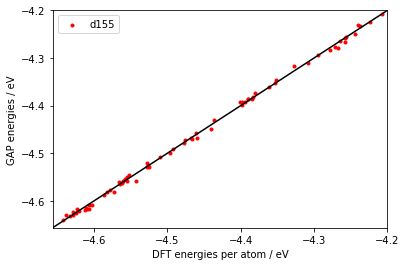

In [41]:
dfig, dax = plt.subplots()
energy_error(d155, ax=dax, by_config=False, color='r', rmse=False, label='d155')
energy_error(d155_v, ax=dax, by_config=False, color='b', rmse=False, label='d155_v')
energy_error(d155_ve4, ax=dax, by_config=False, color='g', rmse=False, label='d155_ve')
dax.text(-4.65, -4.5, 'E RMSE Stdev / meV\n{0:6.3f}   {1:6.3f}\n{2:6.3f}   {3:6.3f}\n{4:6.3f}   {5:6.3f}'.format(
    np.average([i['rmse']*1000 for i in d155.data_dict['E_rmse_v']]),
    np.average([i['std']*1000 for i in d155.data_dict['E_rmse_v']]),
    np.average([i['rmse']*1000 for i in d155_v.data_dict['E_rmse_v']]),
    np.average([i['std']*1000 for i in d155_v.data_dict['E_rmse_v']]),
    np.average([i['rmse']*1000 for i in d155_ve4.data_dict['E_rmse_v']]),
    np.average([i['std']*1000 for i in d155_ve4.data_dict['E_rmse_v']])))
dfig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/energy_errors.png')

In [ ]:
d155.calc_similarity()

In [ ]:
similarity_map(d155)

In [ ]:
d155_ve4 = GAP(train_file, val_file, pot_ve4)
d155_ve4.calc()
d155_ve4.analyse(train=True, sorted_order=[0,3,4,1,2])

In [ ]:
d155_ve4.save('/Users/Moji/Documents/Summer20/Ge/Pickles/d155_ve4')

In [ ]:
energy_error(d155_ve4)